# KERAS

Keras es una biblioteca de alto nivel para el desarrollo y entrenamiento de modelos de redes neuronales artificiales. Está escrita en Python y se integra principalmente con TensorFlow.

Desde que TensorFlow adoptó a Keras como su API oficial de alto nivel, el desarrollo y soporte oficial de Keras se centra exclusivamente en TensorFlow. De hecho, las versiones actuales de Keras (por ejemplo, tf.keras) solo funcionan con TensorFlow, y se ha abandonado el soporte oficial para otros backends.

- Integración directa con entrenamiento (model.fit), evaluación (model.evaluate), y predicción (model.predict).
- Compatibilidad con herramientas modernas como TensorBoard, técnicas de regularización, callbacks, etc.


**Hacia el futuro..**

Podemos crear redes neuronales usando solo TensorFlow usando clases como `tf.Variable`, `tf.Module`, operaciones manuale y `@tf.function`. Este enfoque es más bajo nivel y ofrece más control, pero también es más verboso, y además actualmente casi nunca se utiliza.

In [ ]:
!pip install tensorflow
import tensorflow as tf

class RedManual(tf.Module):
    def __init__(self):
        super().__init__()

        # Capa 1: 2 entradas → 4 neuronas
        self.W1 = tf.Variable(tf.random.normal([2, 4]), name='W1')
        self.b1 = tf.Variable(tf.zeros([4]), name='b1')

        # Capa 2: 4 entradas → 3 neuronas
        self.W2 = tf.Variable(tf.random.normal([4, 3]), name='W2')
        self.b2 = tf.Variable(tf.zeros([3]), name='b2')

        # Capa 3: 3 entradas → 1 neurona (salida)
        self.W3 = tf.Variable(tf.random.normal([3, 1]), name='W3')
        self.b3 = tf.Variable(tf.zeros([1]), name='b3')

    @tf.function(input_signature=[tf.TensorSpec(shape=(None, 2), dtype=tf.float32)])
    def __call__(self, x):
        # Capa 1
        z1 = tf.matmul(x, self.W1) + self.b1
        a1 = tf.nn.relu(z1)

        # Capa 2
        z2 = tf.matmul(a1, self.W2) + self.b2
        a2 = tf.nn.relu(z2)

        # Capa 3 (salida)
        z3 = tf.matmul(a2, self.W3) + self.b3
        return z3

modelo = RedManual()

# Entrada de prueba: 2 características
entrada = tf.constant([[1.0, 2.0]], dtype=tf.float32)

# Llamar al modelo
salida = modelo(entrada)
print("Salida:", salida.numpy())



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 537.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
Salida: [[0.]]


La misma red definida con Keras...

In [ ]:
# Lo que harías con Keras
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),
    Dense(3, activation='relu'),
    Dense(1)
])



### ESTRUCTURAS DE CAPAS

1. Modelo Secuencial (Sequential)

El más simple: las capas están apiladas una tras otra. Es como una lista lineal.

- Útil para:
  - Modelos feedforward clásicos (MLPs)
  - Arquitecturas sin ramificaciones ni entradas múltiples
- No sirve si necesitas:
  - Múltiples entradas/salidas
  - Conexiones no lineales (como saltos o uniones)

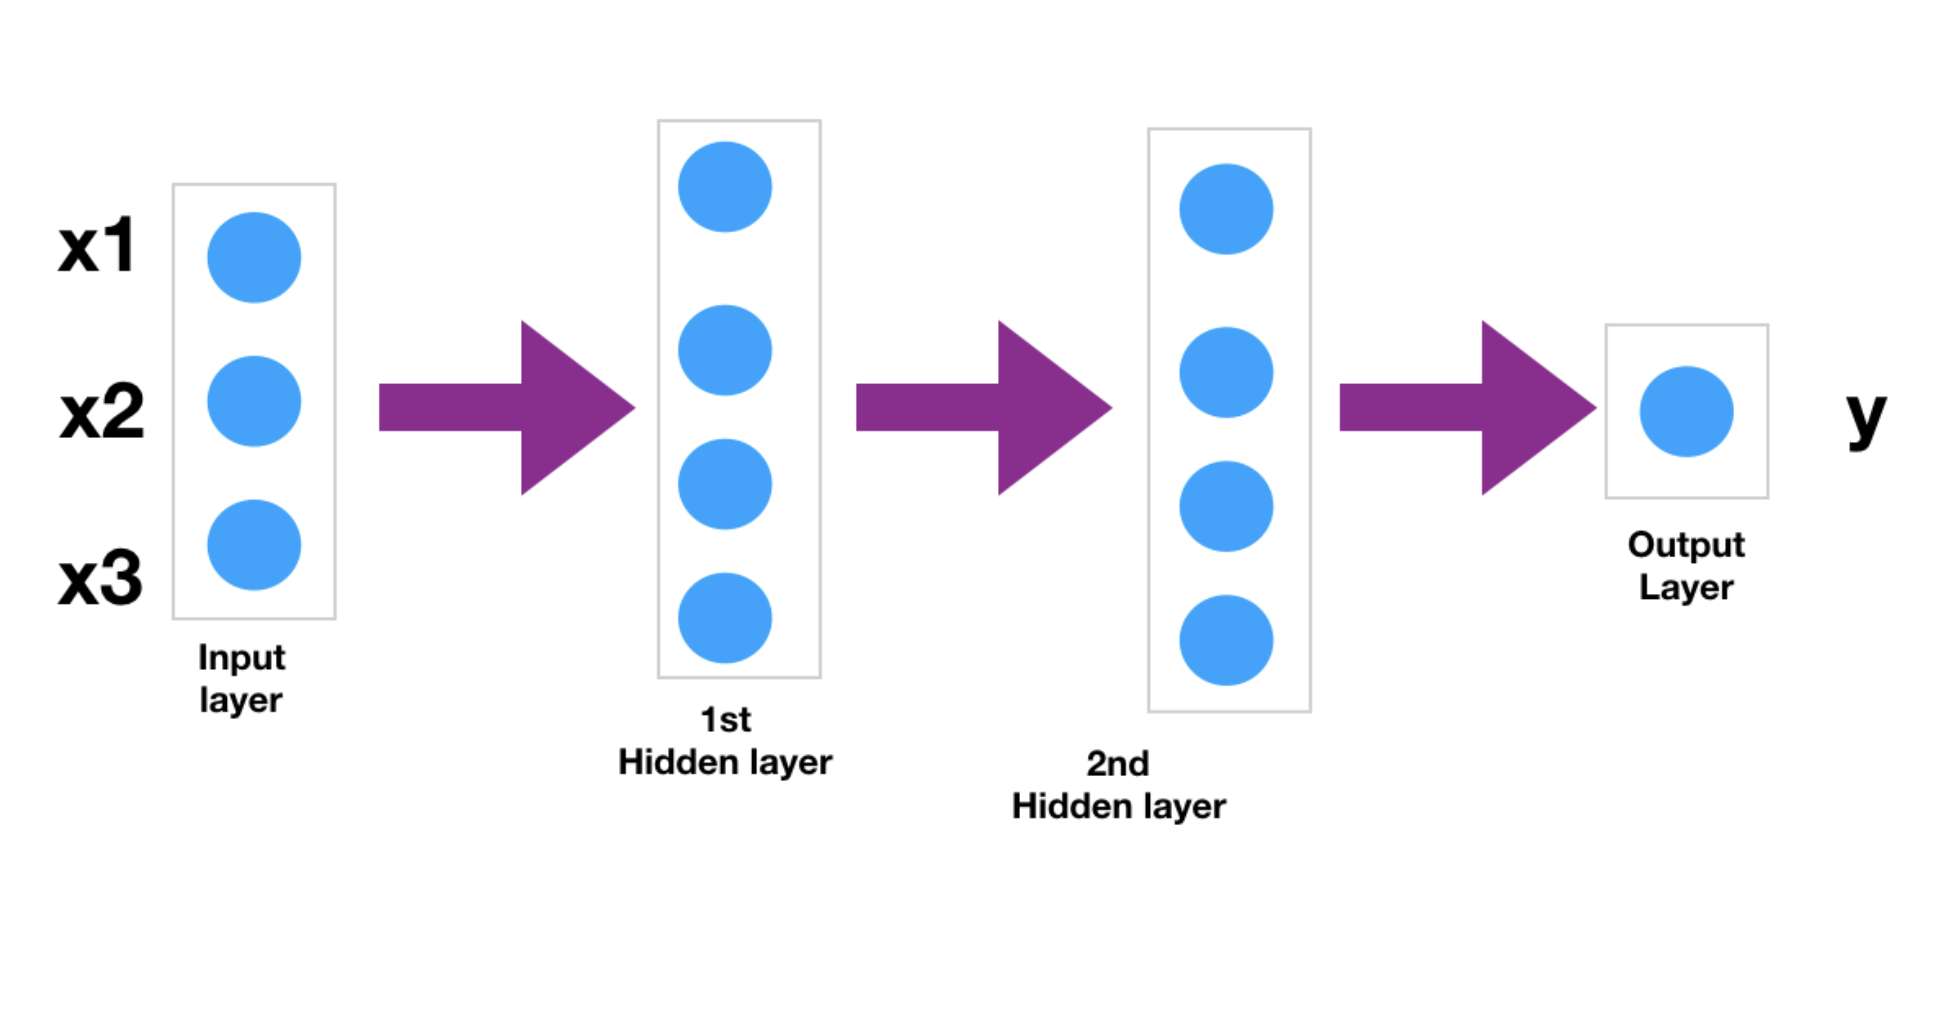

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])


2. Modelo Funcional (Functional API)

Permite crear arquitecturas con múltiples entradas, salidas, ramificaciones o conexiones personalizadas.

- Útil para:
  - Modelos con entradas/salidas múltiples
  - Arquitecturas con bifurcaciones o conexiones complejas

  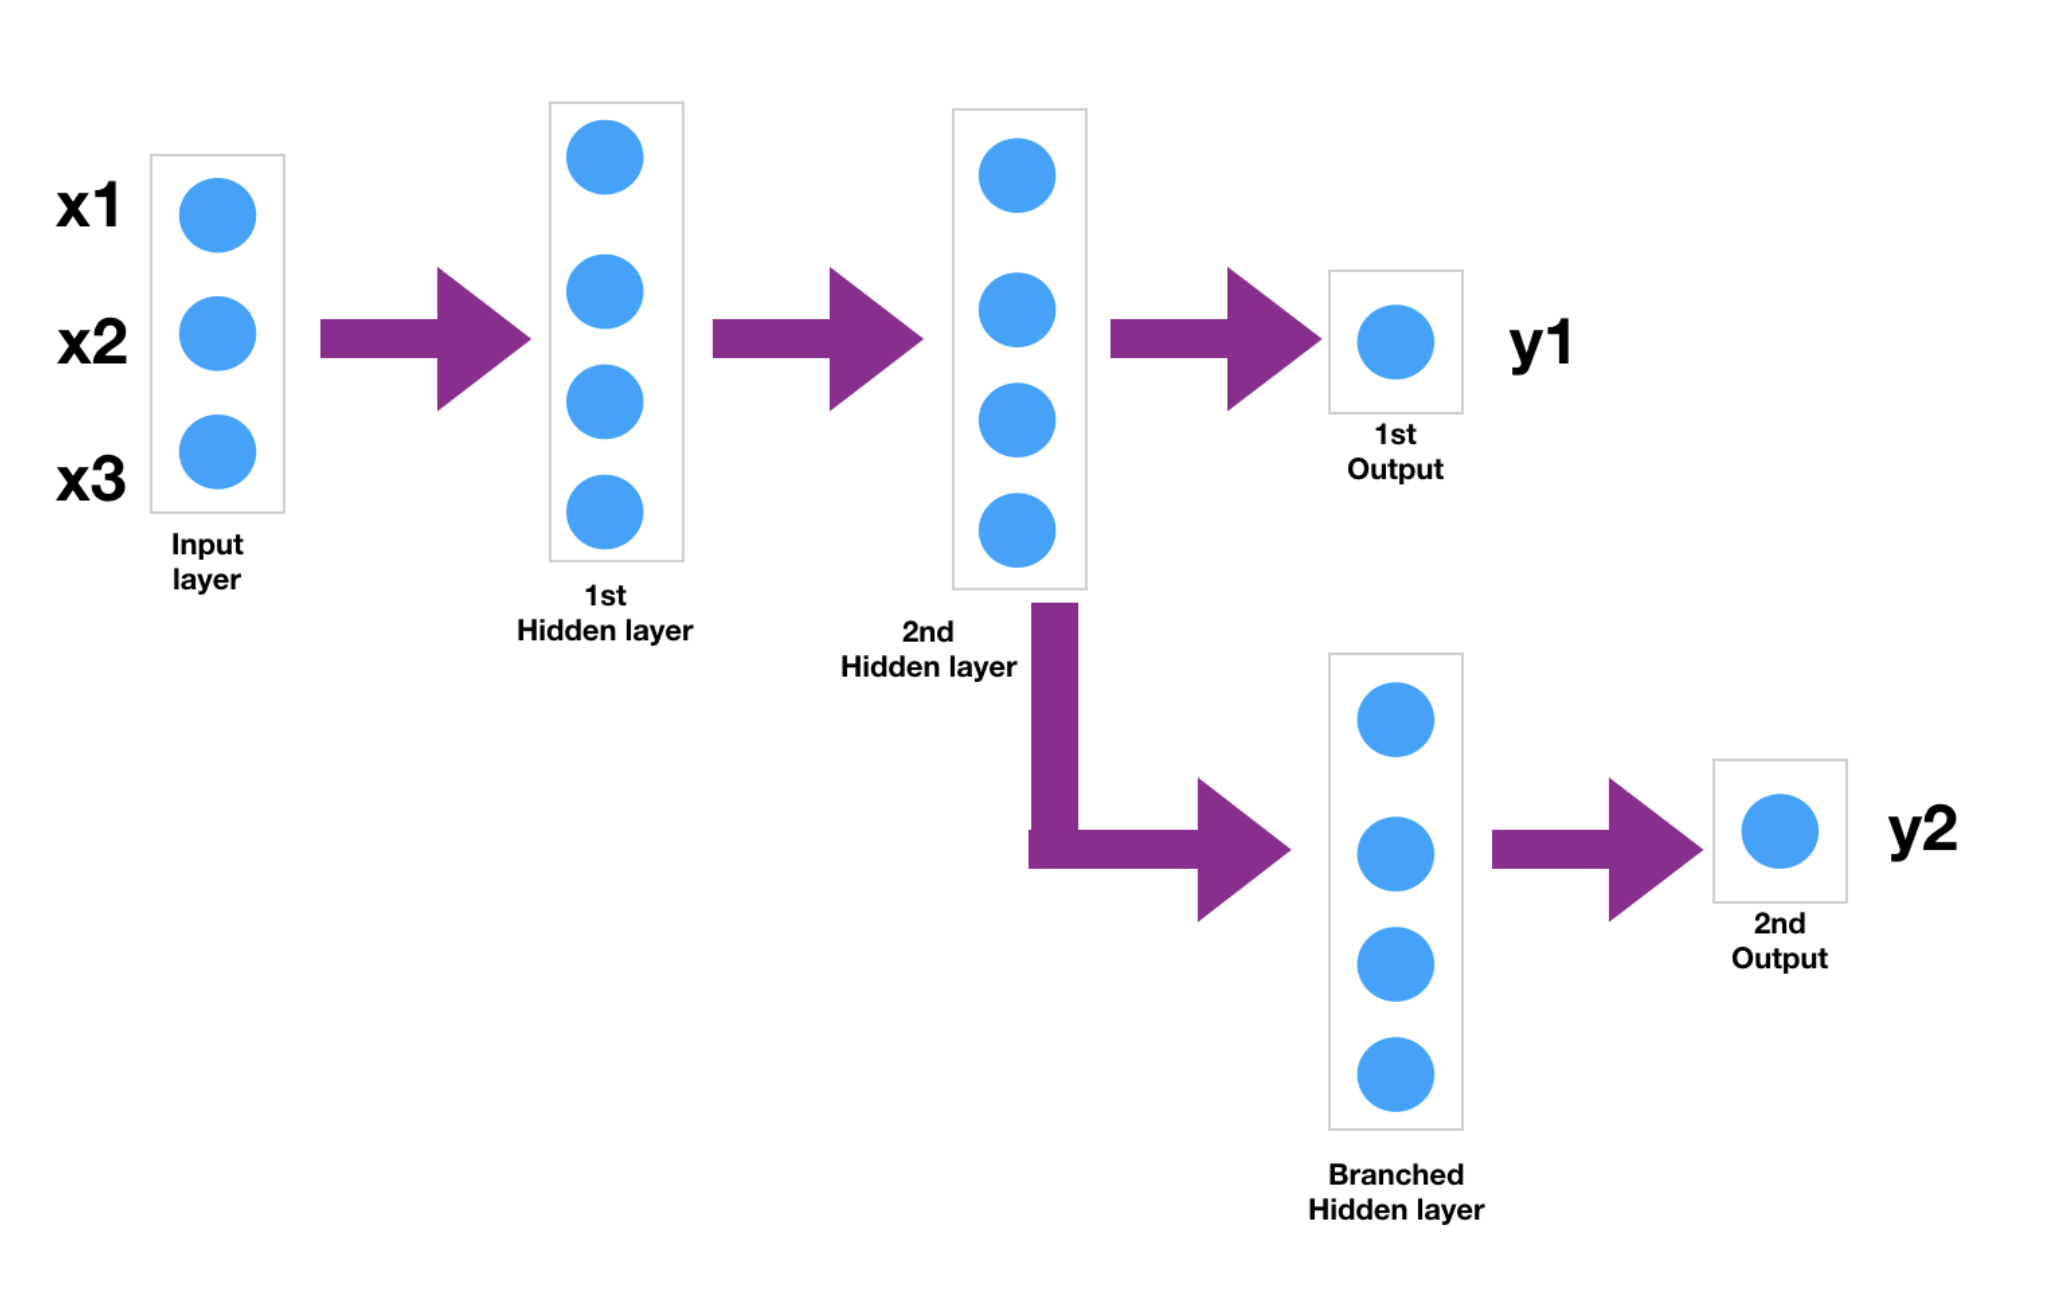

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, concatenate

input1 = Input(shape=(10,))
input2 = Input(shape=(5,))
x1 = Dense(8, activation='relu')(input1)
x2 = Dense(8, activation='relu')(input2)
merged = concatenate([x1, x2])
output = Dense(1)(merged)

model = Model(inputs=[input1, input2], outputs=output)

3. Modelo personalizado con subclases (Model Subclassing)

Tú defines manualmente las capas y el paso hacia adelante. Máxima flexibilidad, peeero necesitas implementar tú mismo el método call() y manejar la lógica.

- Útil para:
  - Arquitecturas no estándar
  - Control completo del flujo de datos
  - Modelos dinámicos o condicionales


### EJEMPLO PASO A PASO CON KERAS DE UN MODELO SECUENCIAL

In [ ]:
import tensorflow as tf
# 1. Preparamos el dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización
x_train = x_train / 255.0
x_test = x_test / 255.0


- Descarga y carga el dataset MNIST dividido en dos partes:
  - x_train: imágenes de entrenamiento (normalmente 60,000 imágenes).
  - y_train: etiquetas correspondientes a las imágenes de entrenamiento (los dígitos del 0 al 9).
  - x_test: imágenes para prueba o validación (normalmente 10,000 imágenes).
  - y_test: etiquetas correspondientes a las imágenes de prueba.
- Los datos se cargan en forma de tuplas para entrenamiento y prueba.
- Normaliza las imágenes de entrenamiento: los valores originales de píxeles van de 0 a 255 (escala de grises). Dividir por 255.0 convierte estos valores a un rango entre 0 y 1, lo cual mejora la convergencia del modelo durante el entrenamiento.

In [ ]:
# 2. Definimos el modelo con Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([ # Modelo secuencial
    # Capa de entrada
    Flatten(input_shape=(28, 28)), # Aplanamos las imágenes de 28x28 a un vector de 784 elementos
    # Capa oculta
    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación ReLU
    # Capa de salida
    Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por cada dígito) y activación softmax, perfecta para clasificación multiclase en una distribución de probabilidades
])


| Tipo de Capa           | Descripción                                             | Uso Común                                  |
|-----------------------|---------------------------------------------------------|--------------------------------------------|
| Dense                 | Capa totalmente conectada (fully connected)             | Redes neuronales feedforward               |
| Conv2D                | Capa convolucional 2D                                   | Procesamiento de imágenes                   |
| MaxPooling2D          | Capa de submuestreo (pooling) 2D                        | Reducción espacial en CNN                   |
| Flatten               | Aplana la entrada multidimensional a un vector         | Transición entre capas convolucionales y densas |
| Dropout               | Capa de regularización que desactiva neuronas aleatoriamente | Evitar overfitting                          |
| LSTM                  | Capa de memoria a largo plazo para secuencias           | Modelos de series temporales y texto       |
| GRU                   | Variante más simple que LSTM para secuencias             | Modelos de secuencia más ligeros            |
| BatchNormalization    | Normaliza las activaciones de la capa anterior          | Mejorar y acelerar el entrenamiento         |
| Activation            | Aplica una función de activación                         | No siempre necesaria si se pone en Dense   |
| Embedding             | Convierte índices enteros en vectores densos            | Modelos de texto y NLP                       |
| GlobalAveragePooling2D| Promedia la entrada espacialmente                        | Reducción dimensional en CNN                 |
| InputLayer            | Capa de entrada explícita                                | Definir forma de entrada                     |


In [ ]:
# 3. Compilamos el modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


La función de pérdida`categorical_crossentropy` espera que las etiquetas estén en formato one-hot encoded (por ejemplo, para la clase 3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).
En cambio, `sparse_categorical_crossentropy` funciona con etiquetas enteras directas (por ejemplo, para la clase 3: solo 3).
Por lo tanto, `sparse_categorical_crossentropy` es más conveniente y eficiente cuando no quieres convertir las etiqueas a one-hot.
Esta función mide la diferencia entre la distribución predicha (probabilidades softmax) y la etiqueta verdadera, penalizando cuando la probabilidad de la clase correcta es baja. `MSE` es usado en regresión o experimentos.










| Optimizer              | Clase TensorFlow                         | ¿Cómo funciona?                                                | ¿Cuándo usarlo?                         |
|------------------------|------------------------------------------|----------------------------------------------------------------|-----------------------------------------|
| **SGD**                | `tf.keras.optimizers.SGD`                | Gradiente descendente simple                                   | Para empezar, básico                    |
| **SGD con Momentum**   | `SGD(momentum=0.9)`                      | Acelera el descenso en direcciones relevantes                  | Si el modelo converge lento             |
| **Nesterov**           | `SGD(momentum=0.9, nesterov=True)`       | Variante anticipada de Momentum                                | Más precisión que Momentum              |
| **Adagrad**            | `tf.keras.optimizers.Adagrad`            | Adapta tasa de aprendizaje individual                          | Datos dispersos, NLP                    |
| **Adadelta**           | `tf.keras.optimizers.Adadelta`           | Variante estable de Adagrad                                    | Para evitar decay acumulativo           |
| **RMSprop**            | `tf.keras.optimizers.RMSprop`            | Usa media móvil del gradiente al cuadrado                      | Muy usado en secuencias, RNNs           |
| **Adam**               | `tf.keras.optimizers.Adam`               | Momentum + RMSprop combinados                                  | ⚡ Recomendado en general                |
| **AdamW**              | `tf.keras.optimizers.AdamW`              | Adam + regularización por peso (weight decay)                  | Con regularización explícita            |
| **Nadam**              | `tf.keras.optimizers.Nadam`              | Adam + Nesterov momentum                                       | Puede converger mejor                   |
| **FTRL**               | `tf.keras.optimizers.Ftrl`               | Diseñado para datos dispersos y de gran escala                 | Regresión o clasificación a gran escala |


In [ ]:
# 4. Entrenamos el modelo (Usando el conjunto de test como validació)
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


En esta versión usamos parte de `x_train` como validación y reservamos `x_test`solo para la **evaluación final**

```python
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de entrenamiento en entrenamiento y validación
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Entrenamos con validación explícita, sin tocar x_test aún
model.fit(x_train_new, y_train_new, epochs=3, validation_data=(x_val, y_val))

# Evaluamos al final con datos realmente nuevos
test_loss, test_acc = model.evaluate(x_test, y_test)
```

¿Qué es lo correcto?

| Método                          | ¿Qué hace?                                                             | Ventajas                                                  | Desventajas                                               | Cuándo usarlo                             |
|---------------------------------|------------------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|-------------------------------------------|
| `validation_data=(x_val, y_val)` | Usa un conjunto de validación **externo** que tú proporcionas         | Control total sobre los datos de validación                | Si usas `x_test`, **puedes contaminar** el test            | Cuando ya tienes conjuntos separados      |
| `validation_split=0.2`          | Usa un **porcentaje de `x_train`** como validación (división interna) | Rápido y fácil, sin dividir manualmente                    | No puedes acceder a los datos de validación                | Prototipos o cuando no necesitas test     |
| `train_test_split`              | Divide `x_train` en `x_train_new` y `x_val` manualmente                | Flexibilidad total, puedes inspeccionar y guardar los datos | Requiere más líneas de código                              | Proyectos serios, control completo        |


In [ ]:
# 5. Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc}")
print(f"Pérdida en test: {test_loss}")


- Aquí se llama al método evaluate del modelo Keras.
- Esta función ejecuta el modelo sobre el conjunto de datos de prueba (x_test) y compara las predicciones con las etiquetas reales (y_test).
- Devuelve dos valores:
  - test_loss: el valor de la función de pérdida (loss) calculado en los datos de prueba.
  - test_acc: el valor de la métrica especificada durante compile (en este caso, la precisión o accuracy) calculada en los datos de prueba.

In [ ]:
# 6. Hacemos predicciones
predictions = model.predict(x_test)

# Mostramos la predicción para el primer ejemplo del test
import numpy as np
predicted_label = np.argmax(predictions[0])
print(f"Predicción para el primer ejemplo del test: {predicted_label}")

""" PRUEBA CON VARIOS EJEMPLOS DEL TEST A VER QUÉ PASA...
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    print(f"Predicción para el ejemplo {i + 1}: {predicted_label}")"""

# Mostramos la probabilidad de cada clase para el primer ejemplo del test
print("Probabilidades para el primer ejemplo del test:")
for i, prob in enumerate(predictions[0]):
    print(f"Clase {i}: {prob * 100:.2f}%")


# 7. Guardamos el modelo en formato Keras (que actualmente es el recomendado para este tipo de modelos)
model.save('mnist_model.keras', include_optimizer=False)
# El parámetro include_optimizer=False es opcional, pero se recomienda para evitar problemas de compatibilidad en futuras versiones de Keras.


# A partir de aquí, el modelo se ha guardado y se puede cargar más adelante sin necesidad de volver a entrenar.

# 8. Cargamos el modelo guardado
from tensorflow.keras.models import load_model
loaded_model = load_model('mnist_model.keras')
loaded_model.compile(optimizer='rmsprop',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# 9. Evaluamos el modelo cargado
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Precisión del modelo cargado en test: {loaded_test_acc}")

# 10. Hacemos predicciones con el modelo cargado
loaded_predictions = loaded_model.predict(x_test)
# Mostramos la predicción para el primer ejemplo del test con el modelo cargado
loaded_predicted_label = np.argmax(loaded_predictions[0])
print(f"Predicción para el primer ejemplo del test con el modelo cargado: {loaded_predicted_label}")
# Mostramos la probabilidad de cada clase para el primer ejemplo del test con el modelo cargado
print(f"Probabilidades para el primer ejemplo del test con el modelo cargado: ")
for i, prob in enumerate(loaded_predictions[0]):
    print(f"Clase {i}: {prob * 100:.2f}%")



Ahora vamos a comprobar que nuestro modelo ha predicho correctamente...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de ejemplos a comprobar
num_ejemplos = 5

for i in range(num_ejemplos):
    # Obtener la etiqueta real
    etiqueta_real = y_test[i]

    # Obtener la predicción (índice de clase con mayor probabilidad)
    etiqueta_predicha = np.argmax(predictions[i])

    # Mostrar resultados
    print(f"Ejemplo {i}: Etiqueta real = {etiqueta_real}, Etiqueta predicha = {etiqueta_predicha}")

    # Mostrar la imagen para referencia visual
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Real: {etiqueta_real}, Predicción: {etiqueta_predicha}")
    plt.axis('off')
    plt.show()


Ahora podríamos pasarle a nuestro modelo nuevas imágenes, por ejemplo, en formato PNG:

```python
from PIL import Image

# Cargar imagen y convertir a escala de grises
imagen = Image.open('ruta/a/tu/imagen.png').convert('L')

# Redimensionar a 28x28
imagen = imagen.resize((28, 28))

# Convertir a array NumPy
nueva_imagen = np.array(imagen)

# Normalizar la imagen
nueva_imagen_norm = nueva_imagen / 255.0

# Cambiar la forma para que sea un batch de tamaño 1: (1, 28, 28)
nueva_imagen_norm = np.expand_dims(nueva_imagen_norm, axis=0)

# Hacer la predicción
prediccion = model.predict(nueva_imagen_norm)

# Obtener la clase con mayor probabilidad
numero_predicho = np.argmax(prediccion)

print(f"El número predicho para la nueva imagen es: {numero_predicho}")
```


In [ ]:
from PIL import Image

# Cargar imagen y convertir a escala de grises
imagen = Image.open('imagenes/images.png').convert('L')

# Redimensionar a 28x28
imagen = imagen.resize((28, 28))

# Convertir a array NumPy
nueva_imagen = np.array(imagen)

# Normalizar la imagen
nueva_imagen_norm = nueva_imagen / 255.0

# Cambiar la forma para que sea un batch de tamaño 1: (1, 28, 28)
nueva_imagen_norm = np.expand_dims(nueva_imagen_norm, axis=0)

# Hacer la predicción
prediccion = model.predict(nueva_imagen_norm)

# Obtener la clase con mayor probabilidad
numero_predicho = np.argmax(prediccion)

print(f"El número predicho para la nueva imagen es: {numero_predicho}")

### TRABAJANDO EN DIFERENTES ENTORNOS.



###### TensorFlow Lite (TFLite)
- Podemos convertir el modelo a TFLite, que es más liviano.
- Ideal para dispositivos móviles o embebidos.

In [ ]:
model = Sequential([ # Modelo secuencial
    # Capa de entrada y primera capa oculta
    Flatten(input_shape=(28, 28)), # Aplanamos las imágenes de 28x28 a un vector de 784 elementos
    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación ReLU
    # Capa de salida
    Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por cada dígito) y activación softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)

predictions = model.predict(x_test)

# 15. Guardamos el modelo en formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Guardamos el modelo TFLite en un archivo
with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)

# 16. Cargamos el modelo TFLite
interpreter = tf.lite.Interpreter(model_path='mnist_model.tflite')

# 17. Preparamos el intérprete
interpreter.allocate_tensors()

# 18. Obtenemos los detalles de las entradas y salidas
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 19. Hacemos una predicción con el modelo TFLite
def predict_tflite(image):
    # Preparamos la imagen
    image = image.reshape(1, 28, 28).astype('float32') / 255.0
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return np.argmax(output_data[0]), output_data[0]

# Probamos la función de predicción TFLite con el primer ejemplo del test
predicted_label_tflite, probabilities_tflite = predict_tflite(x_test[0])
print(f"Predicción TFLite para el primer ejemplo del test: {predicted_label_tflite}")
print(f"Probabilidades TFLite para el primer ejemplo del test: {probabilities_tflite}")



###### XGBoost

- Entrenamos un modelo con XGBoost, un algoritmo de boosting muy usado en Kaggle y problemas tabulares.

In [ ]:

# 30. Guardamos el modelo en formato XGBoost
import xgboost as xgb
# Convertimos los datos de entrenamiento a DMatrix de XGBoost
dtrain = xgb.DMatrix(x_train.reshape(-1, 28 * 28), label=y_train)
# Definimos los parámetros del modelo XGBoost
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 10
}
# Entrenamos el modelo XGBoost
xgb_model = xgb.train(params, dtrain, num_boost_round=5)
# Guardamos el modelo XGBoost en un archivo
xgb_model.save_model('mnist_model.xgb')
# 31. Cargamos el modelo XGBoost
xgb_model_loaded = xgb.Booster()
xgb_model_loaded.load_model('mnist_model.xgb')
# 32. Hacemos una predicción con el modelo XGBoost
def predict_xgboost(image):
    # Preparamos la imagen
    image = xgb.DMatrix(image.reshape(1, -1))  # Aplanamos la imagen
    result = xgb_model_loaded.predict(image)
    return int(result[0]), result[0]  # Devolvemos la clase y las probabilidades
# Probamos la función de predicción XGBoost con el primer ejemplo del test
predicted_label_xgboost, probabilities_xgboost = predict_xgboost(x_test[0])
print(f"Predicción XGBoost para el primer ejemplo del test: {predicted_label_xgboost}")
print(f"Probabilidades XGBoost para el primer ejemplo del test: {probabilities_xgboost}")

### EJEMPLOS PRACTICOS ESTRUCTURAS DE CAPAS

Vamos a ver un ejemplo con IRIS DATASET para entender la diferencia entre las 3 estructuras



###### Secuencial

Objetivos típicos:
  - Clasificar dígitos escritos a mano (MNIST)
  - Detectar spam vs. no spam en correos electrónicos
  - Predecir precios de casas con pocas variables (regresión)
  - Clasificar tipos de flores con el dataset Iris
  - Identificar si una reseña es positiva o negativa (análisis de sentimientos básico)
  - Diagnosticar enfermedades a partir de datos tabulares simples

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# === Carga y preprocesamiento de datos (Iris) ===

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target

# Preprocesamiento
X = StandardScaler().fit_transform(X) # Normalizamos para tener media=0 t std=1
y = tf.keras.utils.to_categorical(y, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Precisión (Sequential): 0.93


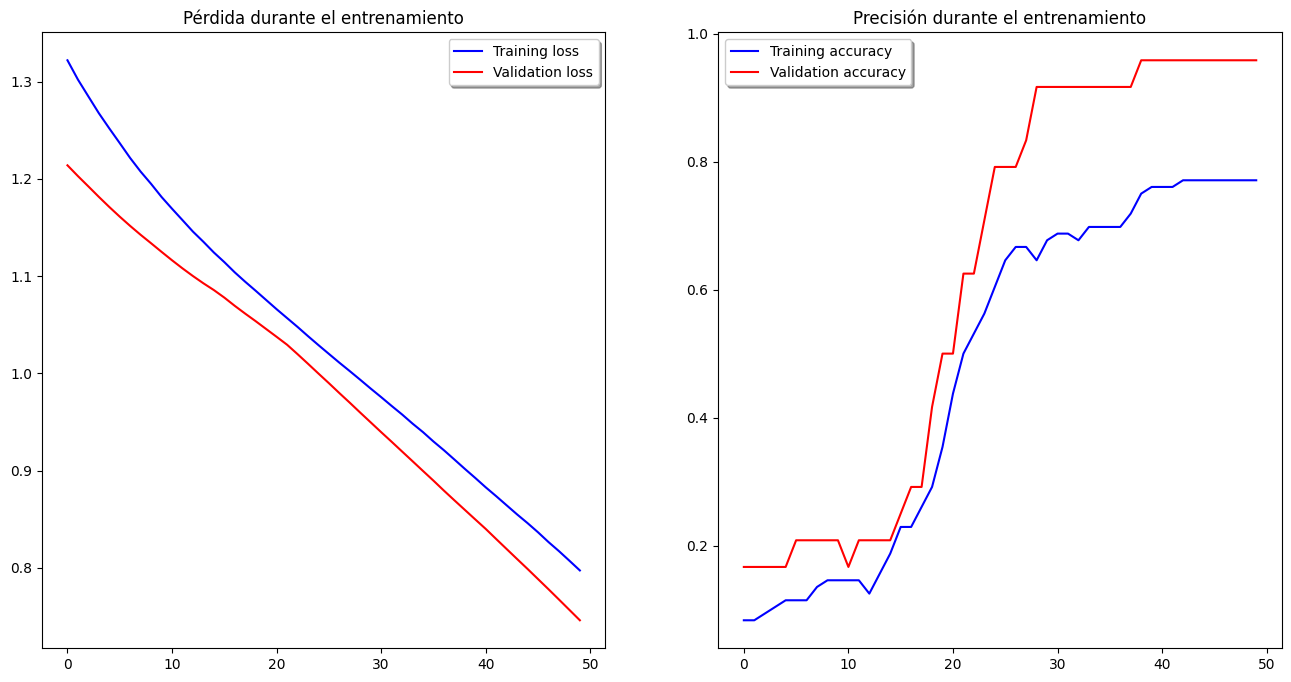


Entrada #0: [ 0.31099753 -0.59237301  0.53540856  0.00087755]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto


In [ ]:
# === Definición del modelo ===
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# === Evaluación ===
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Sequential): {accuracy:.2f}")

# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

# === Predicción de un ejemplo concreto ===
i = 0
predictions = model.predict(X_test, verbose=0)

# Entrada
print(f"\nEntrada #{i}: {X_test[i]}")

# Etiqueta real
real = np.argmax(y_test[i])
print(f"Etiqueta real: {real}")

# Predicción
pred = np.argmax(predictions[i])
print(f"Etiqueta predicha: {pred}")

# Verificación
print("Correcto" if pred == real else "Incorrecto")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207 (828.00 B)

 Trainable params: 207 (828.00 B)

 Non-trainable params: 0 (0.00 B)

Error absoluto medio (MAE): 80.69


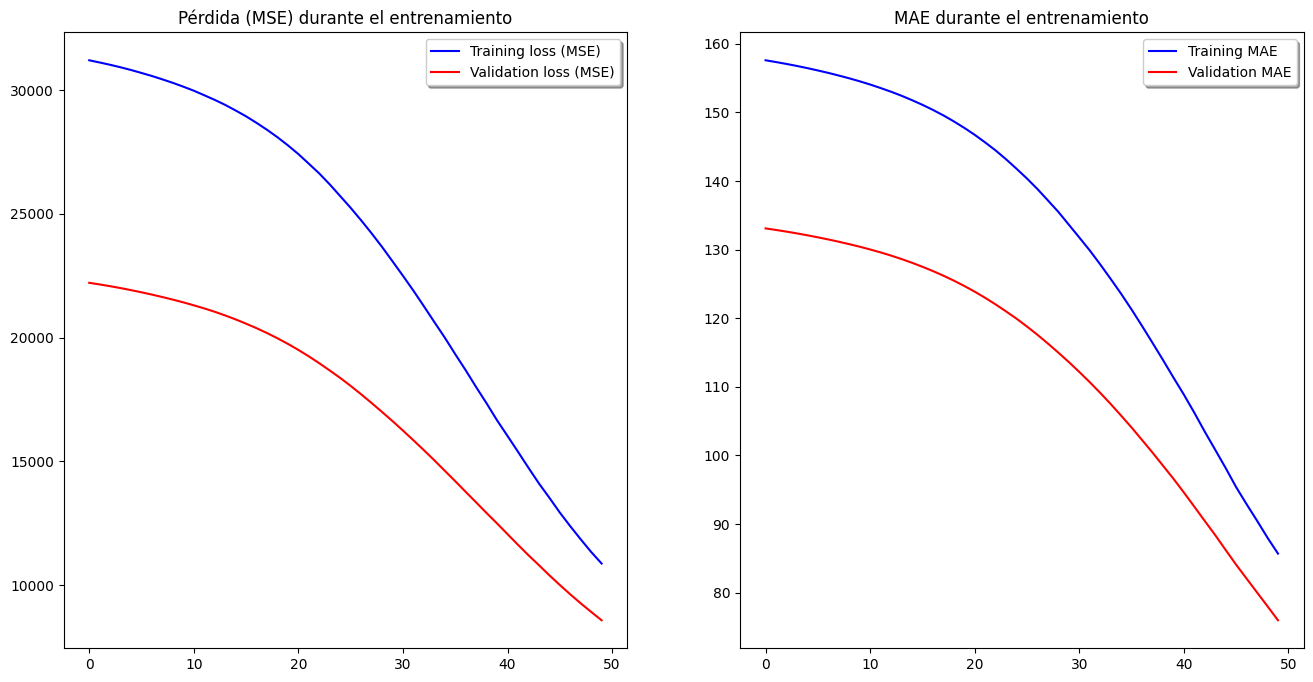


Entrada #0: [ 0.95323959 -0.93853666 -0.13047271 -0.33635919  2.62836772  2.63213934
  0.40338351  0.72130245  0.68185057 -0.1097401 ]
Valor real: 219.00
Valor predicho: 105.80


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === Carga y preprocesamiento de datos ===
data = load_diabetes()
X = data.data
y = data.target

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Definición del modelo ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1)
])

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=0)
# === Evaluación ===
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Error absoluto medio (MAE): {mae:.2f}")

# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss (MSE)")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss (MSE)")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida (MSE) durante el entrenamiento')

# MAE
ax[1].plot(history.history['mae'], color='b', label="Training MAE")
ax[1].plot(history.history['val_mae'], color='r', label="Validation MAE")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('MAE durante el entrenamiento')

plt.show()

# === Predicción de un ejemplo concreto ===
i = 0
predictions = model.predict(X_test, verbose=0)

print(f"\nEntrada #{i}: {X_test[i]}")
print(f"Valor real: {y_test[i]:.2f}")
print(f"Valor predicho: {predictions[i][0]:.2f}")


###### 2. Funcional

Objetivos típicos:
  - Red neuronal con múltiples entradas: imagen + texto → predicción combinada (por ejemplo, descripción de producto + foto para clasificar categoría)
  - Modelos con múltiples salidas (ej: clasificar tipo de objeto y también su ubicación)
  - Red neuronal tipo encoder-decoder (por ejemplo, para traducción automática o resumen de textos)
  - Fusionar datos de sensores distintos (temperatura, presión, velocidad) para predecir fallos en maquinaria
  - Transfer learning: usar una red preentrenada y añadir nuevas capas

Precisión (Functional): 0.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicción para segundo ejemplo del test: Clase 0


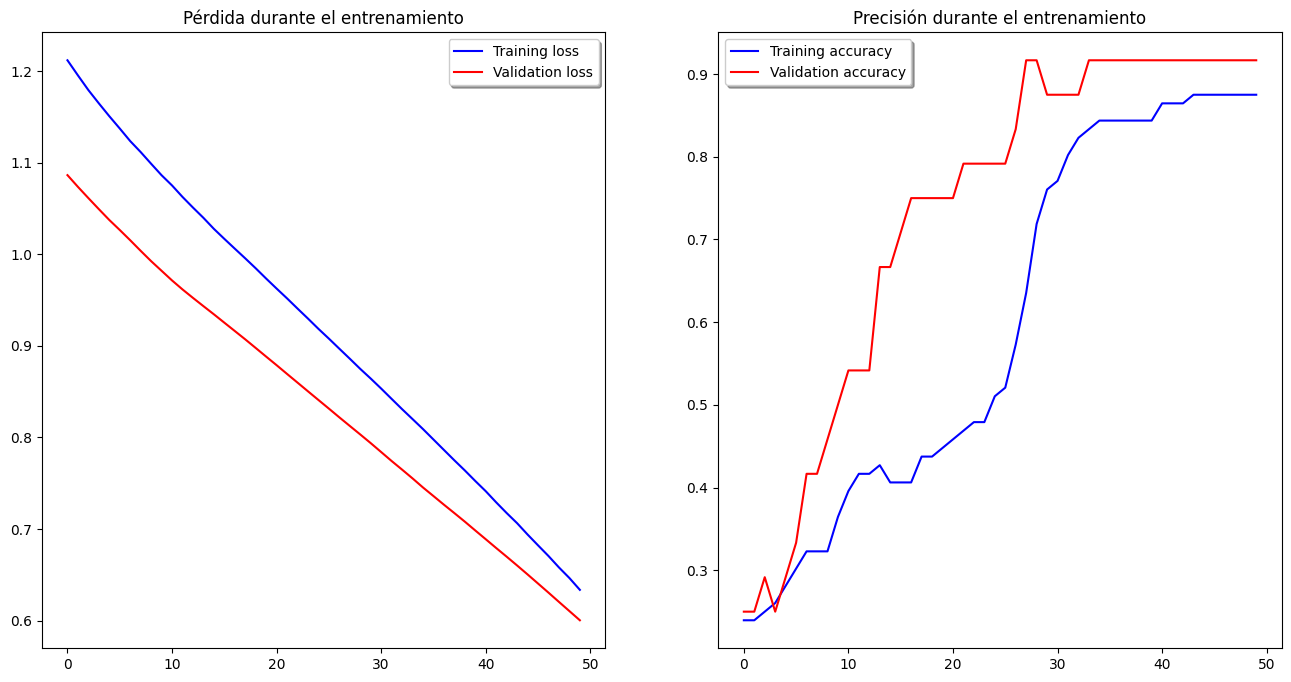


Entrada #0: [ 0.31099753 -0.59237301  0.53540856  0.00087755]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# === Definición del modelo ===
inputs = Input(shape=(4,)) # Definimos los datos de entrada (4 características)
x = Dense(10, activation='relu')(inputs) # Capa oculta 1. Recibe los datos de entrada
x = Dense(8, activation='relu')(x) # Capa oculta 2. Recibe como entrada la salida de la capa anterior
outputs = Dense(3, activation='softmax')(x) # Capa de salida

model = Model(inputs=inputs, outputs=outputs) # Se instancia un modelo de la API funcional de Keras (tf.keras.Model), pasando inputs como entrada y outputs como salida. Internamente, se construye un grafo computacional desde el input hasta el output.

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# === Evaluación ===
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Functional): {accuracy:.2f}")


# === Gráficos del entrenamiento ===
# Gráficos del entrenamiento
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

# === Predicción de un ejemplo concreto ===
i = 0

# Entrada
print(f"\nEntrada #{i}: {X_test[i]}")

# Etiqueta real
real = np.argmax(y_test[i])
print(f"Etiqueta real: {real}")

# Predicción
predictions = model.predict(X_test, verbose=0)
pred = np.argmax(predictions[i])
print(f"Etiqueta predicha: {pred}")

# Verificación
print("Correcto" if pred == real else "Incorrecto")




 3. Model Subclassing
 Objetivos típicos:
  - Construir modelos GAN (Generative Adversarial Networks)
  - Modelos con comportamiento dinámico, como RNN (Redes neuronales recurrentes) personalizadas o atención condicional
  - Modelos de entrenamiento meta (meta-learning)
  - Algoritmos personalizados de entrenamiento o pasos específicos por batch
  - Integrar lógica condicional compleja (por ejemplo, en simulaciones científicas o juegos)
  - Modelos que cambian su arquitectura en tiempo de ejecución

In [ ]:
class ModeloPersonalizado(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = Dense(10, activation='relu')
        self.d2 = Dense(8, activation='relu')
        self.out = Dense(3, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

model = ModeloPersonalizado()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Model Subclassing): {accuracy:.2f}")

prediction = model.predict(X_test)
predicted_label = np.argmax(prediction[2])
print(f"Predicción para tercer ejemplo del test: Clase {predicted_label}")

i = 2

# Entrada
print(f"\nEntrada #{i}: {X_test[i]}")

# Etiqueta real
real = np.argmax(y_test[i])
print(f"Etiqueta real: {real}")

# Predicción
predictions = model.predict(X_test, verbose=0)
pred = np.argmax(predictions[i])
print(f"Etiqueta predicha: {pred}")

# Verificación
print("Correcto" if pred == real else "Incorrecto")



| Característica                   | 1. **Sequential**                      | 2. **API Funcional (Functional)**           | 3. **Model Subclassing**                     |
|---------------------------------|---------------------------------------|----------------------------------------------|----------------------------------------------|
| **Forma de definir el modelo**  | Lista lineal y simple de capas         | Construcción explícita del grafo de flujo de datos | Definición programática creando una clase que hereda de `tf.keras.Model` |
| **Complejidad**                 | Más simple, para modelos secuenciales  | Más flexible, permite modelos con múltiples entradas, salidas y conexiones complejas | Máxima flexibilidad para cualquier tipo de arquitectura y lógica personalizada |
| **Control sobre el flujo**      | Flujo rígido y secuencial               | Flujo definido explícitamente, puedes reutilizar capas y hacer arquitecturas no lineales | Control total: defines exactamente qué pasa en cada llamada con `call()` |
| **Uso recomendado**             | Modelos simples y rápidos de prototipar | Modelos con arquitecturas complejas o ramificadas | Para arquitecturas muy personalizadas, o cuando necesitas lógica dinámica (bucle, condiciones, etc.) |
| **Sintaxis**                   | Muy compacta y declarativa              | Más explícita, con `Input()` y capas aplicadas a tensores | Más verbosa, con programación orientada a objetos |
| **Ejemplo clásico**             | Redes totalmente secuenciales, como MLP | Modelos con múltiples entradas/salidas, redes con saltos, concatenaciones | Redes con lógica personalizada, capas definidas manualmente, modelos dinámicos |
| **Compilación y entrenamiento** | Igual en los tres                      | Igual en los tres                            | Igual en los tres                            |
| **Predicción y evaluación**     | Igual en los tres                      | Igual en los tres                            | Igual en los tres                            |
